<a href="https://colab.research.google.com/github/steveding1/100lines_100days_learning_R/blob/main/MScFE_610_ECON_GWP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install statsmodels
!pip install nelson_siegel_svensson
!pip install pmdarima
!pip install pandas
!pip install arch


     |████████████████████████████████| 63 kB 911 kB/s 
     |████████████████████████████████| 6.4 MB 42.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 1.4 MB 8.3 MB/s 
     |████████████████████████████████| 9.8 MB 39.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninsta

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve,NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols,calibrate_nss_ols
from scipy import stats
from pmdarima.arima import auto_arima
import arch

# 0. Data set selection and 1 Data Importing: 

Select/import an equity ETF from outside the US: [Shares MSCI EAFE Value ETF(EFV)](https://etfdb.com/etf/EFV/#etf-ticker-profile)

Select/import a gold Exchange Traded Fund: [IAU iShares Gold Trust (IAU)](https://etfdb.com/etf/IAU/#etf-ticker-profile)

Import closing daily interest rates of the 6 active benchmarks of US Treasury yields, for the months of October 2019 and November 2019
 (approximately 40 - 45 data points). 2-year, 3-year, 5-year, 7-year, 10-year, and 30-year maturities. 
Data source from [federalreserve.gov](https://www.federalreserve.gov/datadownload/Download.aspx?rel=H15&series=bf17364827e38702b42a58cf8eaa3f78&lastobs=&from=&to=&filetype=csv&label=include&layout=seriescolumn&type=package)



In [3]:
# 1.3 The non-US Equity ETF
evf = yf.Ticker("EFV")
# Make sure this is the right ticker
print(evf.info['longName'])
print('Top 3 holding Names - holding Percent')
[print(h['holdingName'],"-",h['holdingPercent']) for h in evf.info['holdings'][:3]]
evf_df = evf.history(start="2019-10-01", end="2019-11-30")['Close']
evf_df

iShares MSCI EAFE Value ETF
Top 3 holding Names - holding Percent
Novartis AG - 0.0241
Toyota Motor Corp - 0.0221
Commonwealth Bank of Australia - 0.0159


Date
2019-10-01    43.134567
2019-10-02    42.316547
2019-10-03    42.436031
2019-10-04    42.675007
2019-10-07    42.564713
2019-10-08    42.187874
2019-10-09    42.436031
2019-10-10    42.868023
2019-10-11    43.814716
2019-10-14    43.649284
2019-10-15    44.237522
2019-10-16    44.329437
2019-10-17    44.439728
2019-10-18    44.485683
2019-10-21    44.899292
2019-10-22    44.844147
2019-10-23    45.147453
2019-10-24    45.165836
2019-10-25    45.165836
2019-10-28    45.285324
2019-10-29    45.266937
2019-10-30    45.266937
2019-10-31    45.046352
2019-11-01    45.432384
2019-11-04    45.726505
2019-11-05    45.836796
2019-11-06    45.800037
2019-11-07    45.965477
2019-11-08    45.891949
2019-11-11    45.845993
2019-11-12    45.882755
2019-11-13    45.533489
2019-11-14    45.386421
2019-11-15    45.625397
2019-11-18    45.616211
2019-11-19    45.579441
2019-11-20    45.211796
2019-11-21    45.257751
2019-11-22    45.386421
2019-11-25    45.652973
2019-11-26    45.505909
2019-11-27 

In [4]:
# 1.2 the gold ETF - IAU iShares Gold Trust (IAU)
iau = yf.Ticker("IAU")
# Make sure this is the right ticker
print(iau.info['longName'])
iau_df = iau.history(start="2019-10-01", end="2019-11-30")['Close']
iau_df

iShares Gold Trust


Date
2019-10-01    28.340000
2019-10-02    28.680000
2019-10-03    28.820000
2019-10-04    28.820000
2019-10-07    28.559999
2019-10-08    28.820000
2019-10-09    28.840000
2019-10-10    28.580000
2019-10-11    28.420000
2019-10-14    28.520000
2019-10-15    28.360001
2019-10-16    28.500000
2019-10-17    28.540001
2019-10-18    28.500000
2019-10-21    28.360001
2019-10-22    28.459999
2019-10-23    28.540001
2019-10-24    28.740000
2019-10-25    28.799999
2019-10-28    28.540001
2019-10-29    28.440001
2019-10-30    28.639999
2019-10-31    28.920000
2019-11-01    28.920000
2019-11-04    28.860001
2019-11-05    28.379999
2019-11-06    28.520000
2019-11-07    28.059999
2019-11-08    27.900000
2019-11-11    27.799999
2019-11-12    27.900000
2019-11-13    28.000000
2019-11-14    28.120001
2019-11-15    28.059999
2019-11-18    28.160000
2019-11-19    28.160000
2019-11-20    28.160000
2019-11-21    28.000000
2019-11-22    27.959999
2019-11-25    27.820000
2019-11-26    27.959999
2019-11-27 

In [5]:
treasury_df = pd.read_csv(
    "https://raw.githubusercontent.com/steveding1/100lines_100days_learning_R/main/Treasury_rate2019.csv",
    index_col="Series Description",
    parse_dates=['Series Description'],
    )
treasury_df.index.names = ['Date']
treasury_df.columns = treasury_df.columns.str.replace("Market yield on U.S. Treasury securities at ","")
treasury_df = treasury_df[treasury_df['2-year'] != "ND"]
for col in treasury_df.columns:
  treasury_df[col] = treasury_df[col].astype('float32')
treasury_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,2-year,3-year,5-year,7-year,10-year,30-year
Date,,,,,,
2019-10-01,1.56,1.51,1.51,1.59,1.65,2.11
2019-10-02,1.48,1.43,1.43,1.53,1.60,2.09
2019-10-03,1.39,1.34,1.34,1.45,1.54,2.04
2019-10-04,1.40,1.35,1.34,1.43,1.52,2.01
2019-10-07,1.46,1.41,1.38,1.47,1.56,2.05


# 2.Compute the daily returns of the Gold ETF and Equity ETF

In [6]:
#IAU is the gold ETF
iau_df = iau_df.to_frame(name="Price")
iau_df['Return'] = iau_df['Price'].pct_change(1)
#EVF is the foreign stock ETF
evf_df = evf_df.to_frame(name="Price")
evf_df['Return'] = evf_df['Price'].pct_change(1)

In [7]:
evf_df.head()

,Price,Return
Date,,
2019-10-01,43.134567,NaN
2019-10-02,42.316547,-0.018964
2019-10-03,42.436031,0.002824
2019-10-04,42.675007,0.005631
2019-10-07,42.564713,-0.002585


# Data Summaries
Compute the average yield for each benchmark security/Gold ETF/Equity ETF for both November 2019 and October 2019.

And then standard deviation for all of above.


In [8]:
#Average Oct and Nov Treasury Yields
avg_treasury = treasury_df.resample('M').mean()
avg_treasury

,2-year,3-year,5-year,7-year,10-year,30-year
Date,,,,,,
2019-10-31,1.551364,1.528182,1.525000,1.61500,1.706818,2.190454
2019-11-30,1.612632,1.612105,1.639474,1.73579,1.812105,2.280526


In [9]:
#The Standard Deviation to Oct and Nov Treasury Yields
treasury_df.resample('M').std()

,2-year,3-year,5-year,7-year,10-year,30-year
Date,,,,,,
2019-10-31,0.080315,0.096443,0.104460,0.100653,0.104808,0.101300
2019-11-30,0.033804,0.044043,0.052755,0.061039,0.065028,0.076918


In [10]:
print("The Gold ETF average price\n",iau_df.Price.resample('M').mean(),"\n")
print("The non-US Equity ETF average price\n",evf_df.Price.resample('M').mean(),"\n")
print("The Gold ETF standard deviation\n",iau_df.Price.resample('M').std(),"\n")
print("The non-US Equity ETF standard deviation\n",evf_df.Price.resample('M').std(),"\n")

The Gold ETF average price
 Date
2019-10-31    28.597391
2019-11-30    28.126000
Freq: M, Name: Price, dtype: float64 

The non-US Equity ETF average price
 Date
2019-10-31    43.985360
2019-11-30    45.601962
Freq: M, Name: Price, dtype: float64 

The Gold ETF standard deviation
 Date
2019-10-31    0.174804
2019-11-30    0.317165
Freq: M, Name: Price, dtype: float64 

The non-US Equity ETF standard deviation
 Date
2019-10-31    1.150413
2019-11-30    0.228831
Freq: M, Name: Price, dtype: float64 



# 4.Graphing

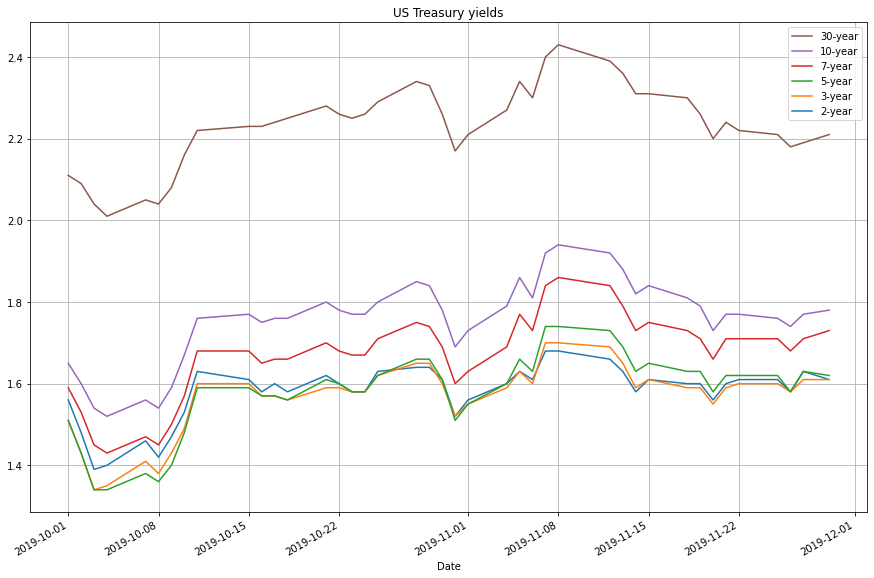

In [11]:
treasury_df.plot(figsize=(15,10), grid=True, title='US Treasury yields', legend ='reverse')
plt.show()

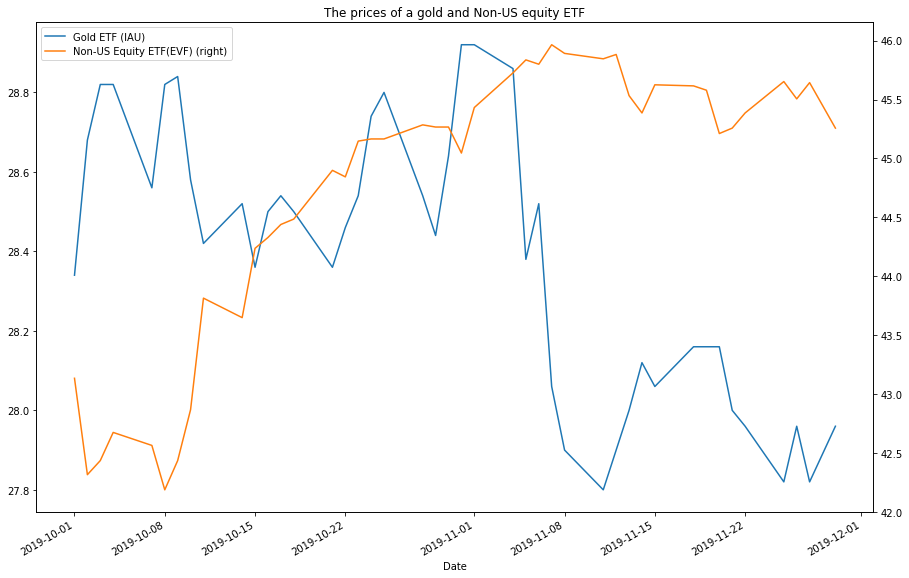

In [12]:
plt.figure(figsize=(15,10))
plt.title('The prices of a gold and Non-US equity ETF')

ax1 = iau_df["Price"].plot(label='Gold ETF (IAU)')
ax2 = evf_df["Price"].plot(secondary_y=True, label='Non-US Equity ETF(EVF)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


# 5.	Fitting the Yield Curve

NelsonSiegelCurve(beta0=2.5349152885619293, beta1=-0.8131502887696784, beta2=-1.8864997158809016, tau=3.8431225455956914)


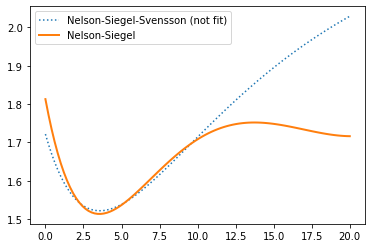

In [13]:
#Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve. Write out the equation.
t = np.array([2.0,3.0,5.0,7.0,10.0,30.0])
t1 = np.linspace(0,20,100)
y10 = np.array(avg_treasury.iloc[0]) # Oct yields

curve_fit1, status1 = calibrate_ns_ols(t,y10) #NS model calibrate
assert status1.success
print(curve_fit1)
curve_fit, status = calibrate_nss_ols(t,y10,(1,2)) #NSS model calibrate
#assert status.success - NSS fit cannot pass
#print(curve_fit)
plt.plot(t1,curve_fit1(t1),linestyle=":")
plt.plot(t1,curve_fit(t1),linewidth=2)
plt.legend(['Nelson-Siegel-Svensson (not fit)','Nelson-Siegel'])
plt.show()

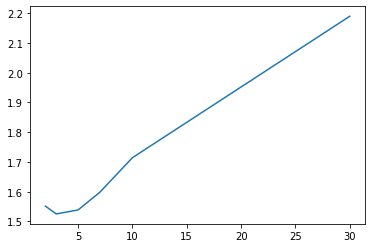

In [14]:
curve_fit1
y = NelsonSiegelCurve(beta0=2.5349152885619293, beta1=-0.8131502887696784, beta2=-1.8864997158809016, tau=3.8431225455956914)
plt.plot(t, y(t))

NelsonSiegelCurve(beta0=2.654783941978952, beta1=-0.9992537320967745, beta2=-1.4350011443752382, tau=4.654239772899611)


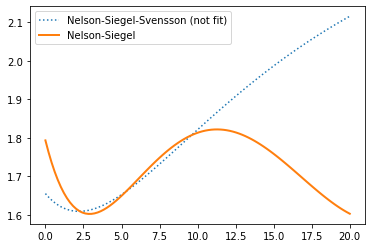

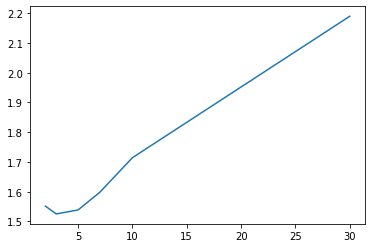

In [15]:
t = np.array([2.0,3.0,5.0,7.0,10.0,30.0])
t1 = np.linspace(0,20,100)
y10 = np.array(avg_treasury.iloc[1]) # Nov yields

curve_fit1, status1 = calibrate_ns_ols(t,y10) #NS model calibrate
assert status1.success
print(curve_fit1)
curve_fit, status = calibrate_nss_ols(t,y10,(1,2)) #NSS model calibrate
#assert status.success - NSS fit cannot pass
#print(curve_fit)
plt.plot(t1,curve_fit1(t1),linestyle=":")
plt.plot(t1,curve_fit(t1),linewidth=2)
plt.legend(['Nelson-Siegel-Svensson (not fit)','Nelson-Siegel'])
plt.show()
y = NelsonSiegelCurve(beta0=2.5349152885619293, beta1=-0.8131502887696784, beta2=-1.8864997158809016, tau=3.8431225455956914)
plt.plot(t, y(t))
plt.show()


# 6.Modeling Prices - ARMA

Using ETF prices, run an ARMA model with your choice of parameters.

In [16]:
#spilt 2 ETF data by 2 months
iau_df_oct = iau_df[iau_df.index<'2019-11-01']
evf_df_oct = evf_df[evf_df.index<'2019-11-01']
iau_df_nov = iau_df[iau_df.index>='2019-11-01']
evf_df_nov = evf_df[evf_df.index>='2019-11-01']

In [17]:
#What auto_arima's judges about the parameters(p,q,i)?
#http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html?highlight=stepwise
models = []
i = 0
for df in iau_df_oct,evf_df_oct,iau_df_nov,evf_df_nov:
  print('\n==============',['iau_df_oct','evf_df_oct','iau_df_nov','evf_df_nov'][i],'==============\n')
  models.append(auto_arima(df["Price"], #start_p=1, start_q=1, max_p=3, max_q=3,
             seasonal=False,trace=True,stepwise=True))
  #best model's performance indicators
  print(models[i].summary())
  i=i+1


============== iau_df_oct ==============

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3.025, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=221.525, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-0.105, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1.664, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4.005, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11.988, Time=0.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-15.695, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-15.918, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept  

# 7.Modelling Volatility

In [18]:
def fit_garch(data):
    garch = arch.arch_model(data.dropna(), vol='garch', p=1, o=0, q=1)
    garch_fitted = garch.fit()
    print(garch_fitted.summary())
models = []
i = 0
for df in iau_df_oct,evf_df_oct,iau_df_nov,evf_df_nov:
  print('\n********************************',
        ['Gold Oct','Non US Equity oct','Gold Nov','Non US Equity Nov'][i],
        '********************************\n')
  #daily high minus low
  print("High minus low price during the month:")
  print("{:.2f}".format(df.Price.max() - df.Price.min()))
  #Average price
  print("The average price of the month:")
  print("{:.2f}".format(df.Price.mean()))
  #returns standard deviation
  print("Returns standard deviation for the month:")
  print("{:.4f}".format(df.Return.std()))
  #GARCH(1,1)
  fit_garch(df.Return)

  i = i+1


******************************** Gold Oct ********************************

High minus low price during the month:
0.58
The average price of the month:
28.60
Returns standard deviation for the month:
0.0063
Iteration:      1,   Func. Count:      6,   Neg. LLF: -80.80744757327038
Iteration:      2,   Func. Count:     18,   Neg. LLF: -80.80806150743906
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -80.80806154258079
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                80.8081
Distribution:                  Normal   AIC:                          -153.616
Method:            Maximum Likelihood   BI

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.794e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.337e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), D

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                78.9679
Distribution:                  Normal   AIC:                          -149.936
Method:            Maximum Likelihood   BIC:                          -145.953
                                        No. Observations:                   20
Date:                Mon, Apr 04 2022   Df Residuals:                       19
Time:                        10:25:05   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.2278e-04  2.476e-07    899.747      0.000 [2.

#9. Compute the Pearson correlation between the gold and equity returns in October / November 2019. 

In [19]:
corr_oct = stats.pearsonr(iau_df_oct.Return.dropna(),evf_df_oct.Return.dropna())
print('The correlation of gold and equity ETFs in October 2019 is {0:.3f}, with p-value at {0:.2f}.'.format(corr_oct[0],corr_oct[1]))
corr_oct = stats.pearsonr(iau_df_nov.Return.dropna(),evf_df_nov.Return.dropna())
print('The correlation of gold and equity ETFs in October 2019 is {0:.3f}, with p-value at {0:.2f}.'.format(corr_oct[0],corr_oct[1]))

The correlation of gold and equity ETFs in October 2019 is -0.648, with p-value at -0.65.
The correlation of gold and equity ETFs in October 2019 is -0.452, with p-value at -0.45.
